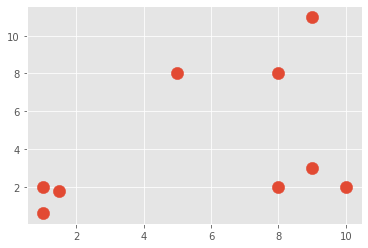

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]

In [15]:
class Mean_Shift:
   # def __init__(self, radius=4): 
    #    self.radius = radius
    # how we can optimize radius instead of setting it?
    def __init__(self, radius=None, radius_norm_step = 100):
        # radius_nore_step 代表着要迭代多少次radius，从而选取最优的radius
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    def fit(self,data):
        if self.radius==None:
            all_data_centroid=np.average(data,axis=0)
            all_data_norm=np.linalg.norm(all_data_centroid)
            self.radius=all_data_norm/self.radius_norm_step
            
        centroids={}
        # Initialize Centroids:
        for i in range(len(data)):
            centroids[i]=data[i]
            
        weights=[i for i in range(self.radius_norm_step)][::-1]
        
        while True:
            new_centroids=[]
            for i in centroids:
                in_bandwidth=[]
                centroid=centroids[i]
                # iterate the dataset to see if it fits in the radius of this centroid
                
                for featureset in data:
                    #if np.linalg.norm(featureset-centroid) < self.radius:
                    #    in_bandwidth.append(featureset)
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance/self.radius)
                    # weight_index represents how many steps we take from the centroid
                    # weight_index larger, the point is quite far from this centroid
                    
                    # if the weight_index is larger than the upper limit of raius_norm_step,
                    # we just use radius_norm_step to represent it
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1

                    to_add = (weights[weight_index]**2)*[featureset] # expand the dataset
                    in_bandwidth +=to_add
                    
                    
                new_centroid=np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques=sorted(list(set(new_centroids))) 
            # we want unique array instead of unique element, therefore we choose tuple and set
            
            # because we ues to_add to expand the dataset, there're more data
            # some of them can be quite close to each other, but they are not the same
            # therefore we define function to get rid of this problem:
            to_pop = []

            for i in uniques:
                for ii in [i for i in uniques]:
                    if i == ii:
                        pass # literally itself, we should ignore
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        #print(np.array(i), np.array(ii))
                        # i and ii belongs to one centroid
                        to_pop.append(ii)
                        break

            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
            
            
            prev_centroids=dict(centroids) #储存原有的中心点，与新中心点对比
            
            centroids={}
            for i in range(len(uniques)): # 获取新的中心点
                centroids[i]=np.array(uniques[i])
                
            optimized=True
            for i in centroids:
                if not np.array_equal(centroids[i],prev_centroids[i]):
                    optimized=False
                if not optimized:
                    break #break the for loop，从while开始重新迭代
            if optimized:
                break # break the while loop
        self.centroids=centroids
        
        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            #compare distance to either centroid
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            #print(distances)
            classification = (distances.index(min(distances)))

            # featureset that belongs to that cluster
            self.classifications[classification].append(featureset)
            
            
    def predict(self,data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            #print(distances)
        classification = (distances.index(min(distances)))
        return classification
            

{0: array([1.18211438, 1.50109686]), 1: array([7.45598917, 8.44263203]), 2: array([8.97302521, 2.50551952])}


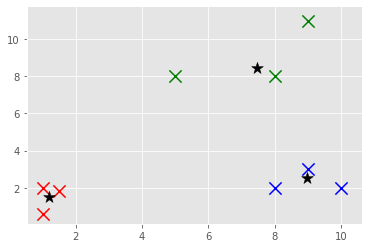

In [18]:
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids
print(centroids)

colors = 10*['r','g','b','c','k','y']

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker = "x", color=color, s=150, linewidths = 5)

for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color='k', marker = "*", s=150)

plt.show()

{0: array([-2.93690996,  9.18056102])}


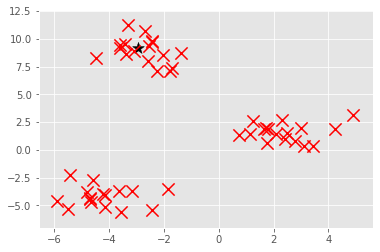

In [23]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=3, n_features=2)
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids
print(centroids)

colors = 10*['r','g','b','c','k','y']

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker = "x", color=color, s=150, linewidths = 5, zorder = 10)

for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color='k', marker = "*", s=150)

plt.show()